<a href="https://colab.research.google.com/github/cap508/PythonNotebooks/blob/main/DecisionTrees/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
### Python Bootcamp 2024



# Introduction

Have you ever heard of the game 20 questions?

In this game you are allowed to ask only yes and no questions. The aim is to  identify a person or thing that is hidden from you. A decision tree, is at heart, an example of how a computer might try to play that game. Unfortunately our computer doesn't have quite the range of imagination that you or I have so we will need to give it a little more structure in it's question asking. In deed we're going to give it the list of questions it can ask and say on the basis of the answers can you identify the thing we are thinking of.

We're going to consider a problem in which the computer needs to learn how to distinguish between different classes of animal based on a number of predefined features. We're going to give it the questions it can ask but it is going to learn how to make use of those questions.

The data we're going to use comes from Kaggle, a site which hosts machine learning competitions. In this case we are going to use the zoo-animal-classification data set

https://www.kaggle.com/datasets/uciml/zoo-animal-classification.


We have access to two separate csv files. The first, zoo.csv, contains the animals and their features. The second, class.csv, is simply a list of the class names. Let's dive into Python and have a look at the data.


Let's start by adding the pandas package and reading the csv files from my github into two separate dataframes.

In [1]:
import pandas as pd

# First we need to read in the data we are going to deal with.
# for our example this is two files. The first (zoo) is a set of animals and their attributes.
# the second is a set of labels that we have allocated to the animals.
zoo_data = pd.read_csv('https://raw.githubusercontent.com/cap508/PythonNotebooks/main/DecisionTrees/zoo.csv')
cls_data = pd.read_csv('https://raw.githubusercontent.com/cap508/PythonNotebooks/main/DecisionTrees/class.csv')


## Examine the data

It is good practice to take a look at the data before we start building a model so let's do that. In the code cell below use the pandas head function to look at the first few rows of each file to see what we have.
If you can't remember how to do that unhide the following test block to get the instructions.

In [2]:
# Enter your code into this cell


###Solution


In [3]:
print(zoo_data.head(3))
print(cls_data.head(3))

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   

   class_type  
0           1  
1           1  
2           4  
   Class_Number  Number_Of_Animal_Species_In_Class Class_Type  \
0             1                                 41     Mammal   
1             2                                 20       Bird   
2             3                                  5    Reptile   

                                        Animal_Names 

### What does the data tell us.

Each row in the table ***zoo_data*** is an animal and each column is a feature that the animal does (1) or does not (0) possess. Note that for the legs column we also include the number of legs that the animal has. Looking at the data it would appear that **breathes** here means breathes air and I struggle to know what the **catsize** feature represents as a **elephant** is catsize and a **duck** is not, all I can think is that this means 'larger than a cat'. The final column is the class type that we are trying to identify encoded as an integer.

A quick note also that the integer on the left of the screen is the row number in the data set and not a feature of the data itself.

Remember we can look at the data simply by typing the name of the object in the jupyter notebook, we do not need a print statement, if it's in a cell on it's own.


When we look at the ***cls_data*** notice again that the first column of numbers is just the row number in the data set. The more important number is the ***class_number*** so class 1 is a mammal, class 2 is a bird etc. If we combine this information with the ***zoo_data*** file we see that "aardvark" is ***class_type*** 1 (mammal) and "bass" is ***class\_type*** 4 (fish).


### Splitting our data

Next we want to split our data up into training and test data. This is easy with packages in the \textsf{sklearn} library. So let's include the package we need.


In [4]:
from sklearn.model_selection import train_test_split


# Then we will do a little bit of data manipulation before calling the split function.
# These two lines create an input set (x) and a set of labels (y) from the zoo_data
# data frame.

x = zoo_data.iloc[:,1:17].values
y = zoo_data.iloc[:,17].values

# We should read [:,1:17] as ``all rows'' and ``columns 1 to 17''.
# Remember that the columns are zero indexes and the upper bound is non inclusive so x has 16 columns.


In [5]:

# Now we are in a position to split the data into training and testing sets.
# Note:  it is usual to have 20% of the data for testing, but we could, of course,
# choose any split percentage we want

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
# Having made the split let's look at the size of the sets we have created.

print(f"x_train has size {x_train.shape}")
print(f"x_test has size {x_test.shape}")
print(f"y_train has size {y_train.shape}")
print(f"y_test has size {y_test.shape}")


x_train has size (80, 16)
x_test has size (21, 16)
y_train has size (80,)
y_test has size (21,)


## Question

What does the shape of the data tell you? i.e. what does (80, 16) mean and what does (80,) mean?


In [7]:
# We are now finally in a position to create our first machine learning model.
# Let's start by including the packages we need.
# I've added a couple of extras here, so don't worry about them for the moment,
# we will use them later.

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt


In [8]:
# So here it, is the code you need to build a machine-learning model.

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

That's it! the first line creates a classifier and the second line uses the data sets to do the model learning. It *fits* the model to the data, i.e. it calculates the best possible weights to minimise the errors in the training set.

This pattern of:

1.  Select and process the data
2.  Select a model type
3.  Fit the model to the data

Is something you're going to see in almost every machine-learning problem.

# Evaluating your model

So now we have our model we'd better have a look at what we have created and how ``good'' it actually is.

The first thing we are going to do is look at the *Accuracy* of the model. In the broadest sense this just says what percentage of the images it saw it got right. To be specific we mean ...

$
\textsf{Accuracy} = \frac{\textsf{Numder of correct predictions}}{\textsf{Numder of total predictons}}
$

Luckily for us there is a simple way to get this in python. The first step was to import the metrics package from sklearn (look back a few cells to see that we did that).

Looking at the equation above we see that we make a claim about accuracy over a set of predictions. So let's ask our model to make a set of predictions for the test data that we created earlier.

In [9]:
# call the predict function of our model (clf) and send it the test set.
# store the result in a variable called y_pred.
y_pred = clf.predict(x_test)

# Now call the metrics package and ask for the model accuracy
# Note that we have to give it the 'correct' answers so it can calculate
# how well it has done.
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred)}")

Accuracy = 1.0


### Interpreting the accuracy metric.

The number you get returned will tell you how good your model is (for the data set provided) 1.0 is perfect, 0.0 means everything was wrong.

*Note: There is randomness in our process, the machine learning and the test split so you may not always get the same answer. This is one issue with stating performance metrics with certainty. The first 4 or 5 times I ran this I got an accuracy of 1 and only 6 classes in the test set. On the last run I did I got an accuracy of 0.95 and all 7 classes in the test set.*

### Confusion Matrices

Another popular way of looking at the results produced by a classifier is using a confusion matrix.

A confusion matrix is simply a grid (or table) which says how each sample was classified. The easiest way to understand it is to look at one. let's start by creating a confusion matrix for the training data.

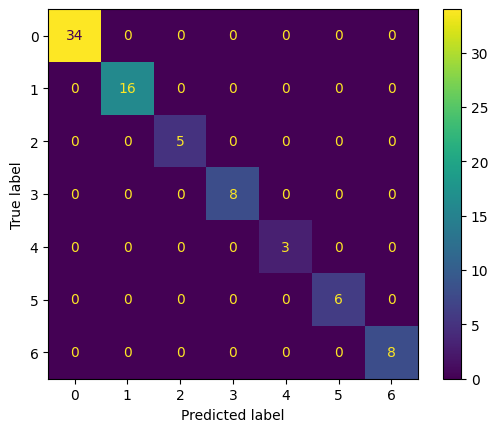

In [10]:
# call our model this time sending in the training set
y_pred = clf.predict(x_train)

# We are going to call the metrics package again, but this time we will ask it
# create a confusion matrix.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred))

# finally we ask the matrix to plot itself. Luckily the process of making
# this pretty is all done for us.
cm_display.plot()
plt.show()

Here we see that the training set has 34 images of class 0 (mammal) which were all correctly classified.

### Challenge
In the box below try creating a confusion matrix for the test data set.

In [11]:
# enter your code into this cell

# Solution

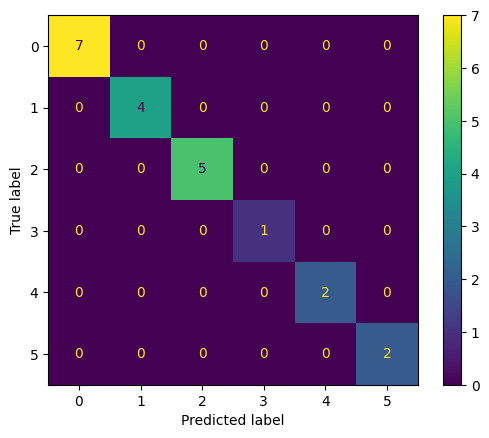

In [12]:
# Note we have to change both the set sent to the predict function
# and the 'correct' labels sent to the display function.
y_pred = clf.predict(x_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))

cm_display.plot()
plt.show()

#Note

Although you may well find that the model works perfectly, this may not be the case for everyone.

Here is an example I got from one run of the model.

![Confusion Matrix - with error](https://github.com/cap508/PythonNotebooks/blob/main/DecisionTrees/CM_Test.png?raw=true)

Here we see that there is one sample of class 4 (amphibian) that is incorrectly classified as class 2 (bird). You can also see that the data split gave us no samples of class 2 in our test set. Notice that we only have four amphibians in our entire data set so maybe that's why the model struggles to learn how to classify these.

# Vizualizing our Decision Tree
One nice thing about decision trees is that, at least on simple cases, are relatively easy to decipher. Luckily there are python packages which allow us to see how the tree looks in a nice graphical form.

First we want to get the data into the correct form to pass to the vizualization function. This is a little complicated and I've entered it into the worksheet for you but just for completeness I list it here.

You can try to understand what it's doing, but it's really not necessary at this point.

In [13]:
# First we need the feature names
feature_names = zoo_data.columns[1:17]

# Then it gets a little complicated as we need to link the two data tables and
# get the class names in the 'correct' order
viz = zoo_data.copy()
viz["class_type"]=viz["class_type"].values.astype(str)
target_nums = viz['class_type'].unique().tolist()

target_names = []
for i in target_nums:
  for j in range(len(cls_data)):
    if eval(i) == cls_data['Class_Number'][j]:
      target_names.append(cls_data['Class_Type'][j])

# Finally let's print out our results.
print(feature_names)
print(target_names)

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')
['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian', 'Reptile']


Now we are in a position to generate our visualization of the learnt tree. We make use of a function called ***plot_tree*** from the ***sklearn*** library.

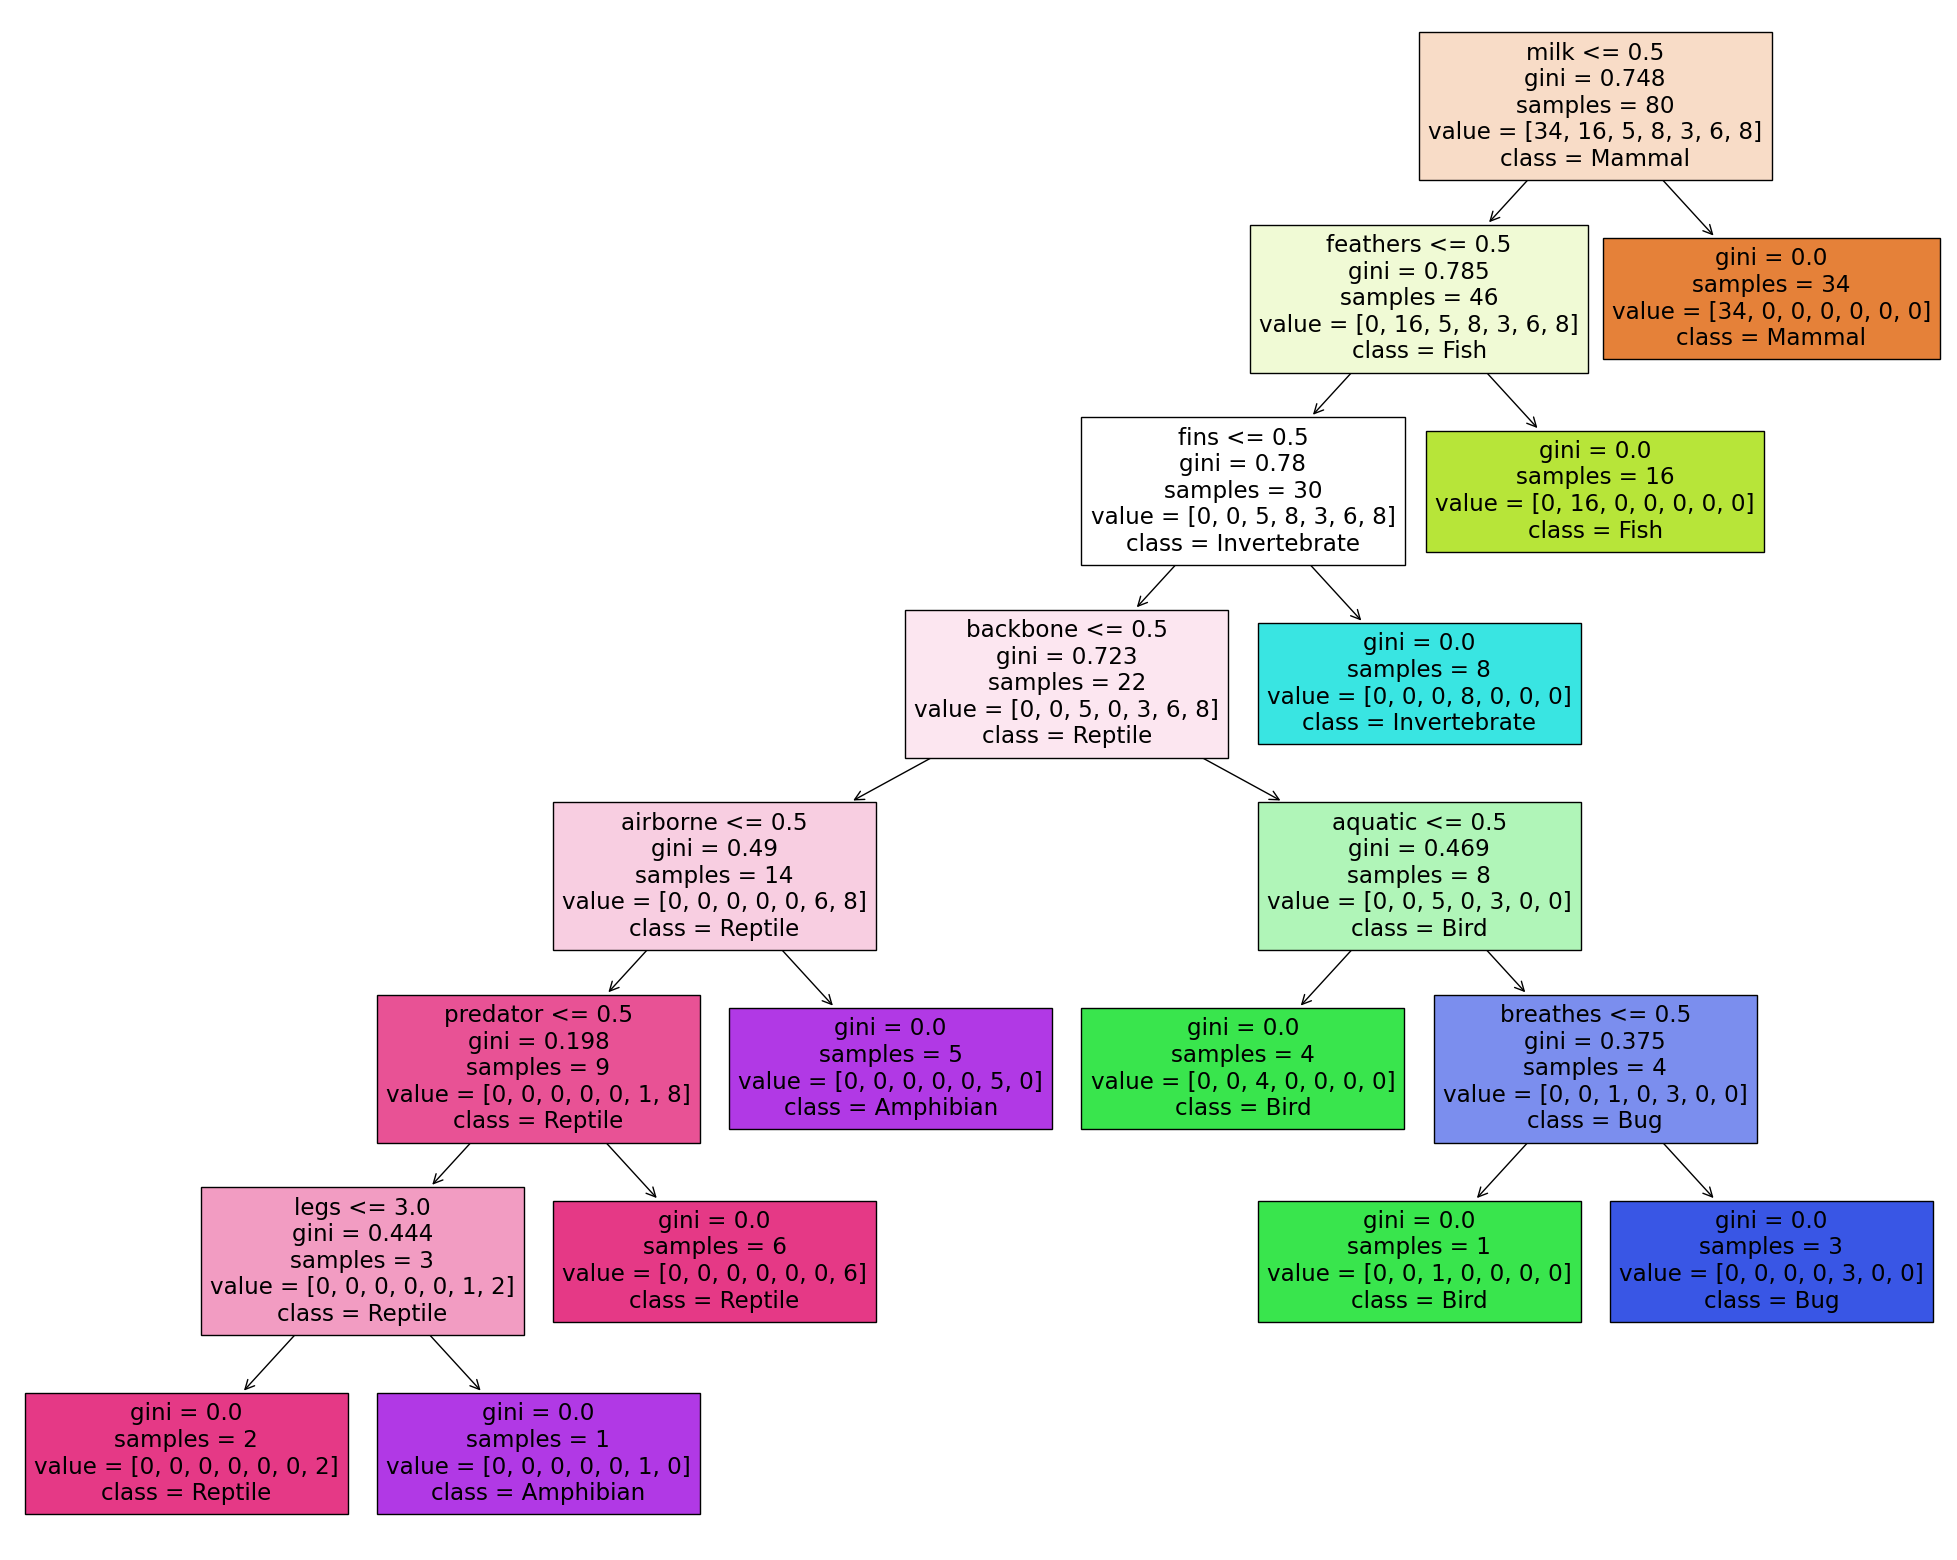

In [14]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(clf, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

## Understanding the tree

The result is shown as a tree in which each box show a decision to be made, e.g. $\textsf{milk} <= 0.5$. if the answer is true then we take the left branch if the answer is false we take the right branch. In the case shown here then if $\textsf{milk} = 1$ then $\textsf{milk} <= 0.5$ is false and we take the right branch will is has no further decisions and the animal is a $\textsf{Mammal}$.

I leave understanding the other variables in the nodes to your own research but this is not crucial to understanding the basics of creating and analysing a decision tree. I would note however that whilst this tree is relatively simple to understand, it is easy for decision trees to become large, unwieldy and hence difficult to understand for real-world problems.

# Using the model in the wild

As a final exercise try entering the features of an animal and seeing if your model works more generally. Can you think of a creature which doesn't conform?

How about mythical creatures?

Using the cell below change the features of an animal and run your model to see what it predicts.

Also, what animal was I thinking of when I created this?

In [16]:
# Animal Features
hair = 0
feathers = 1
eggs = 1
milk = 0
airborne = 0
aquatic = 1
preadtor = 0
toothed = 0
backbone = 1
breathes = 1
venomous = 0
fins = 0
legs = 2
tail = 0
domestic = 0
catsize = 0

# Make a list
my_animal = [hair, feathers, eggs, milk, airborne, aquatic, preadtor, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize]

# Call the model
pred = clf.predict([my_animal])
animal_type = cls_data[cls_data['Class_Number']==pred[0]]['Class_Type'].values[0]

print(f"Your animal is {animal_type}")

Your animal is Bird
